# __Selecting Optimal Location for Pizzeria Restaurant in the Sacramento Region__

### Coursera Capstone Project: Week 5 Battle of the Neighborhoods

In [1]:
# Import required libraries
import itertools
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from urllib.request import urlopen
!pip install beautifulsoup4
from bs4 import BeautifulSoup
import numpy as np
import json
!pip install geopy
from geopy.geocoders import Nominatim
import requests
from pandas.io.json import json_normalize
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
!pip install folium
import folium
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline
import seaborn as sns
!pip install random2
from IPython.display import HTML
import random

print('Libraries imported.')


     |████████████████████████████████| 122kB 5.2MB/s eta 0:00:01
     |████████████████████████████████| 112kB 3.3MB/s eta 0:00:01
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/36/a1/eb/8b267e15c260cf21ca104e217f46587db40eaa906cb04d37c0
Successfully built random2
Libraries imported.


In [2]:
# Create hide_toggle function to hide beautifulsoup output
def hide_toggle(for_next=False):
    this_cell = """$('div.cell.code_cell.rendered.selected')"""
    next_cell = this_cell + '.next()'

    toggle_text = 'Toggle show/hide'  # text shown on toggle link
    target_cell = this_cell  # target cell to control with toggle
    js_hide_current = ''  # bit of JS to permanently hide code in current cell (only when toggling next cell)

    if for_next:
        target_cell = next_cell
        toggle_text += ' next cell'
        js_hide_current = this_cell + '.find("div.input").hide();'

    js_f_name = 'code_toggle_{}'.format(str(random.randint(1,2**64)))

    html = """
        <script>
            function {f_name}() {{
                {cell_selector}.find('div.input').toggle();
            }}

            {js_hide_current}
        </script>

        <a href="javascript:{f_name}()">{toggle_text}</a>
    """.format(
        f_name=js_f_name,
        cell_selector=target_cell,
        js_hide_current=js_hide_current, 
        toggle_text=toggle_text
    )

    return HTML(html)



### __Part 1:  city of Sacramento search__

In [3]:
# Read Top 13 Top-Rated Tourist Attractions website with BeautifulSoup
url = urlopen(r"https://www.planetware.com/tourist-attractions-/sacramento-us-ca-sc.htm")
soup = BeautifulSoup(url,  "html.parser") 
soup

# Hide soup output to spare Notebook viewer
hide_toggle()



In [4]:
# Scrape attraction names from website and create 'Attraction_Name' dataframe
Attraction_Name = []

for div in soup.find_all('div', class_='article_block site'):
    Attraction_Name.append(div.find_all('h2')[0].get_text().strip('\n'))

for i in range(len(Attraction_Name)):
    Attraction_Name[i]= Attraction_Name[i][4:].strip(',')

for i in range(len(Attraction_Name)):
    if i == 9 or i == 10 or i == 11:
        Attraction_Name[i] = Attraction_Name[i][1:]
    else:
        Attraction_Name[i] = Attraction_Name[i][0:]
        
Attraction_Name = Attraction_Name[:-2]
Attraction_Name

['California State Railroad Museum',
 'State Capitol',
 'Crocker Museum of Art',
 'Old Sacramento',
 "Sutter's Fort State Historic Park",
 'California Automobile Museum',
 'Fairytale Town',
 'Sacramento Zoo',
 'Cathedral of the Blessed Sacrament',
 'California State Indian Museum State Historic Park',
 'Midtown',
 'American River Bike Trail/Jedediah Smith Memorial Trail',
 'Leland Stanford Mansion State Historical Park']

In [5]:
# Adjust attraction names in order for geolocator to recognize them 
Attraction_Name[1]= 'Capital Park Sacramento'
Attraction_Name[2]= 'Sacramento Crocker Museum'
Attraction_Name[8]= 'Cathedral of the Blessed Sacrament Sacramento'
Attraction_Name[9]= 'California State Indian Museum'
Attraction_Name[10]= 'Midtown 1915 O St, Sacramento, CA 95811'
Attraction_Name[11]= 'American River Bike Trail'
Attraction_Name

['California State Railroad Museum',
 'Capital Park Sacramento',
 'Sacramento Crocker Museum',
 'Old Sacramento',
 "Sutter's Fort State Historic Park",
 'California Automobile Museum',
 'Fairytale Town',
 'Sacramento Zoo',
 'Cathedral of the Blessed Sacrament Sacramento',
 'California State Indian Museum',
 'Midtown 1915 O St, Sacramento, CA 95811',
 'American River Bike Trail',
 'Leland Stanford Mansion State Historical Park']

In [6]:
# Use geolocator and used a loop to search for, intentify longitude and latitude, then populate a dataframe
Latitude = []
Longitude = []

for name in Attraction_Name:
    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode(name)
    latitude = location.latitude
    longitude = location.longitude
    print(f'{name}: [{latitude}, {longitude}]')
    Latitude.append(latitude)
    Longitude.append(longitude)        
        
print('\n')
print('DataFrames Latitude & Longitude have been updated.')

California State Railroad Museum: [38.58497285, -121.50430271143694]
Capital Park Sacramento: [14.5699932, 121.0202179]
Sacramento Crocker Museum: [38.5771169, -121.5061707]
Old Sacramento: [38.5810606, -121.4938951]
Sutter's Fort State Historic Park: [38.57258175, -121.4712809691325]
California Automobile Museum: [38.570361750000004, -121.51175375667944]
Fairytale Town: [38.53972325, -121.50109474953933]
Sacramento Zoo: [38.539187150000004, -121.50436114980647]
Cathedral of the Blessed Sacrament Sacramento: [38.57900675, -121.49200235302118]
California State Indian Museum: [38.57302335, -121.47172438081367]
Midtown 1915 O St, Sacramento, CA 95811: [38.5723431, -121.4875272]
American River Bike Trail: [38.5802621, -121.4179232]
Leland Stanford Mansion State Historical Park: [38.5762942, -121.4977331]


DataFrames Latitude & Longitude have been updated.


In [7]:
# Fix lat / long coordinates for Capital Park since geolocator came up with a location in Phillipines
Latitude[1] = float(38.57605)
Longitude[1] = float(-121.49072)
print(Latitude[1])
print(Longitude[1])

38.57605
-121.49072


In [8]:
# Merge the three seperate lists into one
Attractions = pd.DataFrame({'Attraction':Attraction_Name, 'Latitude':Latitude, 'Longitude': Longitude})
Attractions

,Attraction,Latitude,Longitude
0,California State Railroad Museum,38.584973,-121.504303
1,Capital Park Sacramento,38.576050,-121.490720
2,Sacramento Crocker Museum,38.577117,-121.506171
3,Old Sacramento,38.581061,-121.493895
4,Sutter's Fort State Historic Park,38.572582,-121.471281
5,California Automobile Museum,38.570362,-121.511754
6,Fairytale Town,38.539723,-121.501095
7,Sacramento Zoo,38.539187,-121.504361
8,Cathedral of the Blessed Sacrament Sacramento,38.579007,-121.492002
9,California State Indian Museum,38.573023,-121.471724


In [9]:
# Identify the Latitude, Longitude for Sacramento, CA
address = 'Sacramento, CA'

geolocator = Nominatim(user_agent="coursera")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates for Sacramento are {}, {}.'.format(latitude, longitude))

The geograpical coordinates for Sacramento are 38.5810606, -121.4938951.


In [10]:
# Create a general map of Sacramento
map_sac = folium.Map(location=[latitude, longitude], zoom_start=13)

# add markers to map
for lat, lng, label in zip(Attractions['Latitude'], Attractions['Longitude'], Attractions['Attraction']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=7,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_sac)  
    
map_sac

In [11]:
# Define Foursquare credentials
CLIENT_ID = '************************************************' # your Foursquare ID
CLIENT_SECRET = '************************************************' # your Foursquare Secret
ACCESS_TOKEN = '************************************************' # your FourSquare Access Token
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails: <Hidden>')

Your credentails: <Hidden>


In [12]:
# Define function to get nearby venues
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
                
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [13]:
# Create dataframe with geospatial coordinates for sacramento venues
sac_venues = getNearbyVenues(names=Attractions['Attraction'], 
                                 latitudes=Attractions['Latitude'], 
                                 longitudes=Attractions['Longitude'], 
                                 radius=500)

California State Railroad Museum
Capital Park Sacramento
Sacramento Crocker Museum
Old Sacramento
Sutter's Fort State Historic Park
California Automobile Museum
Fairytale Town
Sacramento Zoo
Cathedral of the Blessed Sacrament Sacramento
California State Indian Museum
Midtown 1915 O St, Sacramento, CA 95811
American River Bike Trail
Leland Stanford Mansion State Historical Park


In [14]:
# Identified 545 venues within 500 feet from all 13 attractions
sac_venues.shape

(545, 7)

In [15]:
# Peek at sac_venues dataframe
sac_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,California State Railroad Museum,38.584973,-121.504303,California State Railroad Museum,38.584462,-121.504015,History Museum
1,California State Railroad Museum,38.584973,-121.504303,Luis Jr.'s,38.584096,-121.503875,Mexican Restaurant
2,California State Railroad Museum,38.584973,-121.504303,Vega's Night Club & Sports Bar,38.583971,-121.503882,Nightclub
3,California State Railroad Museum,38.584973,-121.504303,The Chefs' Olive Mix,38.583265,-121.504095,Gourmet Shop
4,California State Railroad Museum,38.584973,-121.504303,The Other Office,38.583360,-121.504121,Dive Bar


In [16]:
# Count number of unique categories in the dataframe
print('There are {} uniques categories of venues.'.format(len(sac_venues['Venue Category'].unique())))

There are 120 uniques categories of venues.


In [17]:
# Count number of venues in each Neighborhood
sac_venues.groupby(['Neighborhood']).count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
American River Bike Trail,13,13,13,13,13,13
California Automobile Museum,4,4,4,4,4,4
California State Indian Museum,35,35,35,35,35,35
California State Railroad Museum,61,61,61,61,61,61
Capital Park Sacramento,97,97,97,97,97,97
Cathedral of the Blessed Sacrament Sacramento,69,69,69,69,69,69
Fairytale Town,34,34,34,34,34,34
Leland Stanford Mansion State Historical Park,36,36,36,36,36,36
"Midtown 1915 O St, Sacramento, CA 95811",35,35,35,35,35,35


In [18]:
# Create sac_onehot dataframe from sac_venues dataframe
sac_onehot = pd.get_dummies(sac_venues[['Venue Category']], prefix="", prefix_sep="")

# Add neighborhood column back to sac_onehot dataframe
sac_onehot['Neighborhood'] =sac_venues['Neighborhood'] 

sac_onehot.shape

(545, 120)

In [19]:
# Peek at sac_onehot dataframe
sac_onehot.head()

,Accessories Store,American Restaurant,Art Museum,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bakery,Bank,Bar,Baseball Field,Basketball Stadium,Beer Bar,Beer Garden,Bike Shop,Boat or Ferry,Brasserie,Breakfast Spot,Bridal Shop,Building,Burger Joint,Cafeteria,Café,Candy Store,Chinese Restaurant,Chocolate Shop,Cocktail Bar,Coffee Shop,Comedy Club,Comic Shop,Convenience Store,Cosmetics Shop,Credit Union,Creperie,Cycle Studio,Deli / Bodega,Dessert Shop,Diner,Dive Bar,Donut Shop,Farmers Market,Fast Food Restaurant,French Restaurant,Frozen Yogurt Shop,Garden,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,History Museum,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Juice Bar,Karaoke Bar,Kids Store,Lake,Laundry Service,Light Rail Station,Lounge,Massage Studio,Mediterranean Restaurant,Mexican Restaurant,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Movie Theater,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Park,Pedestrian Plaza,Performing Arts Venue,Pharmacy,Pizza Place,Platform,Playground,Plaza,Pool,Pub,Rental Car Location,Restaurant,Salon / Barbershop,Sandwich Place,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Snack Place,Soup Place,Sports Bar,State / Provincial Park,Steakhouse,Street Food Gathering,Sushi Restaurant,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Thrift / Vintage Store,Tiki Bar,Toy / Game Store,Train Station,Vegetarian / Vegan Restaurant,Wine Bar,Winery,Yoga Studio,Zoo,Zoo Exhibit
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,California State Railroad Museum,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,California State Railroad Museum,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,California State Railroad Museum,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,California State Railroad Museum,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,California State Railroad Museum,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [20]:
#Find the Neighborhood column
sac_onehot.columns[78]

'Neighborhood'

In [21]:
# Move neighborhood column to the first column
fixed_columns = [sac_onehot.columns[78]] + list(sac_onehot.columns[0:78]) + list(sac_onehot.columns[79:])
sac_onehot = sac_onehot[fixed_columns]

sac_onehot.head()

,Neighborhood,Accessories Store,American Restaurant,Art Museum,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bakery,Bank,Bar,Baseball Field,Basketball Stadium,Beer Bar,Beer Garden,Bike Shop,Boat or Ferry,Brasserie,Breakfast Spot,Bridal Shop,Building,Burger Joint,Cafeteria,Café,Candy Store,Chinese Restaurant,Chocolate Shop,Cocktail Bar,Coffee Shop,Comedy Club,Comic Shop,Convenience Store,Cosmetics Shop,Credit Union,Creperie,Cycle Studio,Deli / Bodega,Dessert Shop,Diner,Dive Bar,Donut Shop,Farmers Market,Fast Food Restaurant,French Restaurant,Frozen Yogurt Shop,Garden,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,History Museum,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Juice Bar,Karaoke Bar,Kids Store,Lake,Laundry Service,Light Rail Station,Lounge,Massage Studio,Mediterranean Restaurant,Mexican Restaurant,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Movie Theater,Museum,Music Venue,New American Restaurant,Nightclub,Park,Pedestrian Plaza,Performing Arts Venue,Pharmacy,Pizza Place,Platform,Playground,Plaza,Pool,Pub,Rental Car Location,Restaurant,Salon / Barbershop,Sandwich Place,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Snack Place,Soup Place,Sports Bar,State / Provincial Park,Steakhouse,Street Food Gathering,Sushi Restaurant,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Thrift / Vintage Store,Tiki Bar,Toy / Game Store,Train Station,Vegetarian / Vegan Restaurant,Wine Bar,Winery,Yoga Studio,Zoo,Zoo Exhibit
0,California State Railroad Museum,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,California State Railroad Museum,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,California State Railroad Museum,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,California State Railroad Museum,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,California State Railroad Museum,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [22]:
# Double check correct number of rows and columns
sac_onehot.shape

(545, 120)

In [23]:
# Get mean value of each Neighborhood
sac_grouped = sac_onehot.groupby('Neighborhood').mean().reset_index()
sac_grouped

,Neighborhood,Accessories Store,American Restaurant,Art Museum,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bakery,Bank,Bar,Baseball Field,Basketball Stadium,Beer Bar,Beer Garden,Bike Shop,Boat or Ferry,Brasserie,Breakfast Spot,Bridal Shop,Building,Burger Joint,Cafeteria,Café,Candy Store,Chinese Restaurant,Chocolate Shop,Cocktail Bar,Coffee Shop,Comedy Club,Comic Shop,Convenience Store,Cosmetics Shop,Credit Union,Creperie,Cycle Studio,Deli / Bodega,Dessert Shop,Diner,Dive Bar,Donut Shop,Farmers Market,Fast Food Restaurant,French Restaurant,Frozen Yogurt Shop,Garden,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,History Museum,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Juice Bar,Karaoke Bar,Kids Store,Lake,Laundry Service,Light Rail Station,Lounge,Massage Studio,Mediterranean Restaurant,Mexican Restaurant,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Movie Theater,Museum,Music Venue,New American Restaurant,Nightclub,Park,Pedestrian Plaza,Performing Arts Venue,Pharmacy,Pizza Place,Platform,Playground,Plaza,Pool,Pub,Rental Car Location,Restaurant,Salon / Barbershop,Sandwich Place,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Snack Place,Soup Place,Sports Bar,State / Provincial Park,Steakhouse,Street Food Gathering,Sushi Restaurant,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Thrift / Vintage Store,Tiki Bar,Toy / Game Store,Train Station,Vegetarian / Vegan Restaurant,Wine Bar,Winery,Yoga Studio,Zoo,Zoo Exhibit
0,American River Bike Trail,0.000000,0.076923,0.000000,0.076923,0.000000,0.000000,0.153846,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.076923,0.000000,0.076923,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.076923,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,California Automobile Museum,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.25,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,California State Indian Museum,0.000000,0.028571,0.000000,0.000000,0.000000,0.000000,0.000000,0.028571,0.028571,0.000000,0.000000,0.000000,0.028571,0.000000,0.000000,0.000

In [24]:
# Peek at sac_grouped dataframe
sac_grouped.shape

(13, 120)

In [25]:
# Identify the top 5 frequent categories of venues in each Neighborhood
num_top_venues = 5

for hood in sac_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = sac_grouped[sac_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----American River Bike Trail----
               venue  freq
0             Bakery  0.15
1              Diner  0.08
2     Sandwich Place  0.08
3   Sushi Restaurant  0.08
4  Mobile Phone Shop  0.08


----California Automobile Museum----
               venue  freq
0             Museum  0.50
1       Intersection  0.25
2                Gym  0.25
3  Accessories Store  0.00
4      Movie Theater  0.00


----California State Indian Museum----
                   venue  freq
0     Mexican Restaurant  0.09
1            Coffee Shop  0.06
2            Pizza Place  0.06
3  Performing Arts Venue  0.03
4             Shoe Store  0.03


----California State Railroad Museum----
                 venue  freq
0  American Restaurant  0.07
1       History Museum  0.07
2   Seafood Restaurant  0.05
3                  Bar  0.05
4            Gift Shop  0.05


----Capital Park Sacramento----
                 venue  freq
0          Coffee Shop  0.08
1  American Restaurant  0.08
2       Sandwich Place  0.05
3     Sus

## Time to identify the top 10 most popular VENUES around each of the Attractions!

In [26]:
# Define function to return most common venues
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [27]:
# Create neighborhoods_venues_sorted dataframe of top 10 venues
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = sac_grouped['Neighborhood']

for ind in np.arange(sac_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(sac_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.rename(columns={"Neighborhood":"Attraction"}, inplace=True)
neighborhoods_venues_sorted

,Attraction,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,American River Bike Trail,Bakery,Hotpot Restaurant,Sandwich Place,Bike Shop,Sushi Restaurant,Golf Course,Salon / Barbershop,Diner,Hotel,Arts & Crafts Store
1,California Automobile Museum,Museum,Gym,Intersection,Zoo Exhibit,Frozen Yogurt Shop,Credit Union,Creperie,Cycle Studio,Deli / Bodega,Dessert Shop
2,California State Indian Museum,Mexican Restaurant,Pizza Place,Coffee Shop,Burger Joint,Diner,Dessert Shop,Laundry Service,Deli / Bodega,Lounge,Massage Studio
3,California State Railroad Museum,American Restaurant,History Museum,Gift Shop,Seafood Restaurant,Bar,Pizza Place,Cocktail Bar,Dessert Shop,Dive Bar,Sandwich Place
4,Capital Park Sacramento,American Restaurant,Coffee Shop,Sandwich Place,Nightclub,Hotel,Sushi Restaurant,Chinese Restaurant,Café,Pizza Place,Seafood Restaurant
5,Cathedral of the Blessed Sacrament Sacramento,Coffee Shop,American Restaurant,Hotel,Sandwich Place,Nightclub,Sushi Restaurant,Movie Theater,Park,Deli / Bodega,Chinese Restaurant
6,Fairytale Town,Zoo Exhibit,Theme Park Ride / Attraction,Bakery,Snack Place,Gym / Fitness Center,Zoo,Grocery Store,Golf Course,Gift Shop,Lake
7,Leland Stanford Mansion State Historical Park,Coffee Shop,Mexican Restaurant,Café,Italian Restaurant,Gym / Fitness Center,Pizza Place,Convenience Store,History Museum,Park,Brasserie
8,"Midtown 1915 O St, Sacramento, CA 95811",American Restaurant,Coffee Shop,Sandwich Place,Park,Pizza Place,Mexican Restaurant,Burger Joint,Garden,New American Restaurant,Cocktail Bar
9,Old Sacramento,Coffee Shop,Hotel,American Restaurant,Deli / Bodega,Sandwich Place,Mexican Restaurant,Sushi Restaurant,Movie Theater,BBQ Joint,Bakery


In [28]:
# Use K-means clustering to create correlated groups of neighborhoods
# Set number of clusters
kclusters = 5

sac_grouped_clustering = sac_grouped.drop('Neighborhood', 1)

# Run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(sac_grouped_clustering)

# Check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 0, 4, 1, 1, 1, 2, 1, 1, 1], dtype=int32)

In [29]:
# Add clustering labels to dataframe
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

sac_merged = Attractions

In [30]:
# merge sac_grouped with sac data to add latitude/longitude for each neighborhood
sac_merged = sac_merged.join(neighborhoods_venues_sorted.set_index('Attraction'), on='Attraction')

sac_merged.head(40)   # check the last columns!

,Attraction,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,California State Railroad Museum,38.584973,-121.504303,1,American Restaurant,History Museum,Gift Shop,Seafood Restaurant,Bar,Pizza Place,Cocktail Bar,Dessert Shop,Dive Bar,Sandwich Place
1,Capital Park Sacramento,38.576050,-121.490720,1,American Restaurant,Coffee Shop,Sandwich Place,Nightclub,Hotel,Sushi Restaurant,Chinese Restaurant,Café,Pizza Place,Seafood Restaurant
2,Sacramento Crocker Museum,38.577117,-121.506171,1,History Museum,Italian Restaurant,Sandwich Place,Café,Plaza,Cafeteria,Gym,Farmers Market,Monument / Landmark,Park
3,Old Sacramento,38.581061,-121.493895,1,Coffee Shop,Hotel,American Restaurant,Deli / Bodega,Sandwich Place,Mexican Restaurant,Sushi Restaurant,Movie Theater,BBQ Joint,Bakery
4,Sutter's Fort State Historic Park,38.572582,-121.471281,4,Mexican Restaurant,Coffee Shop,Bar,Pizza Place,Burger Joint,Shoe Store,Cosmetics Shop,Thai Restaurant,Gift Shop,Modern European Restaurant
5,California Automobile Museum,38.570362,-121.511754,0,Museum,Gym,Intersection,Zoo Exhibit,Frozen Yogurt Shop,Credit Union,Creperie,Cycle Studio,Deli / Bodega,Dessert Shop
6,Fairytale Town,38.539723,-121.501095,2,Zoo Exhibit,Theme Park Ride / Attraction,Bakery,Snack Place,Gym / Fitness Center,Zoo,Grocery Store,Golf Course,Gift Shop,Lake
7,Sacramento Zoo,38.539187,-121.504361,2,Zoo Exhibit,Theme Park Ride / Attraction,Bakery,Snack Place,Pharmacy,Chinese Restaurant,Gift Shop,Lake,Theater,Theme Park
8,Cathedral of the Blessed Sacrament Sacramento,38.579007,-121.492002,1,Coffee Shop,American Restaurant,Hotel,Sandwich Place,Nightclub,Sushi Restaurant,Movie Theater,Park,Deli / Bodega,Chinese Restaurant
9,California State Indian Museum,38.573023,-121.471724,4,Mexican Restaurant,Pizza Place,Coffee Shop,Burger Joint,Diner,Dessert Shop,Laundry Service,Deli / Bodega,Lounge,Massage Studio


In [31]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=13)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(sac_merged['Latitude'], sac_merged['Longitude'], sac_merged['Attraction'], sac_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=7,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Cluster 1 Automobile Museum Area:

In [32]:
sac_merged.loc[sac_merged['Cluster Labels'] == 0, sac_merged.columns[[0] + list(range(4, sac_merged.shape[1]))]]


,Attraction,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,California Automobile Museum,Museum,Gym,Intersection,Zoo Exhibit,Frozen Yogurt Shop,Credit Union,Creperie,Cycle Studio,Deli / Bodega,Dessert Shop


### Cluster 2 Capital Area:

In [33]:
sac_merged.loc[sac_merged['Cluster Labels'] == 1, sac_merged.columns[[0] + list(range(4, sac_merged.shape[1]))]]

,Attraction,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,California State Railroad Museum,American Restaurant,History Museum,Gift Shop,Seafood Restaurant,Bar,Pizza Place,Cocktail Bar,Dessert Shop,Dive Bar,Sandwich Place
1,Capital Park Sacramento,American Restaurant,Coffee Shop,Sandwich Place,Nightclub,Hotel,Sushi Restaurant,Chinese Restaurant,Café,Pizza Place,Seafood Restaurant
2,Sacramento Crocker Museum,History Museum,Italian Restaurant,Sandwich Place,Café,Plaza,Cafeteria,Gym,Farmers Market,Monument / Landmark,Park
3,Old Sacramento,Coffee Shop,Hotel,American Restaurant,Deli / Bodega,Sandwich Place,Mexican Restaurant,Sushi Restaurant,Movie Theater,BBQ Joint,Bakery
8,Cathedral of the Blessed Sacrament Sacramento,Coffee Shop,American Restaurant,Hotel,Sandwich Place,Nightclub,Sushi Restaurant,Movie Theater,Park,Deli / Bodega,Chinese Restaurant
10,"Midtown 1915 O St, Sacramento, CA 95811",American Restaurant,Coffee Shop,Sandwich Place,Park,Pizza Place,Mexican Restaurant,Burger Joint,Garden,New American Restaurant,Cocktail Bar
12,Leland Stanford Mansion State Historical Park,Coffee Shop,Mexican Restaurant,Café,Italian Restaurant,Gym / Fitness Center,Pizza Place,Convenience Store,History Museum,Park,Brasserie


### Cluster 3 Zoo & Theme Park Area: 

In [34]:
sac_merged.loc[sac_merged['Cluster Labels'] == 2, sac_merged.columns[[0] + list(range(4, sac_merged.shape[1]))]]

,Attraction,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Fairytale Town,Zoo Exhibit,Theme Park Ride / Attraction,Bakery,Snack Place,Gym / Fitness Center,Zoo,Grocery Store,Golf Course,Gift Shop,Lake
7,Sacramento Zoo,Zoo Exhibit,Theme Park Ride / Attraction,Bakery,Snack Place,Pharmacy,Chinese Restaurant,Gift Shop,Lake,Theater,Theme Park


### Cluster 4 American River Area:

In [35]:
sac_merged.loc[sac_merged['Cluster Labels'] == 3, sac_merged.columns[[0] + list(range(4, sac_merged.shape[1]))]]

,Attraction,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,American River Bike Trail,Bakery,Hotpot Restaurant,Sandwich Place,Bike Shop,Sushi Restaurant,Golf Course,Salon / Barbershop,Diner,Hotel,Arts & Crafts Store


### Cluster 5 Sutter Fort Area: 

In [36]:
sac_merged.loc[sac_merged['Cluster Labels'] == 4, sac_merged.columns[[0] + list(range(4, sac_merged.shape[1]))]]

,Attraction,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Sutter's Fort State Historic Park,Mexican Restaurant,Coffee Shop,Bar,Pizza Place,Burger Joint,Shoe Store,Cosmetics Shop,Thai Restaurant,Gift Shop,Modern European Restaurant
9,California State Indian Museum,Mexican Restaurant,Pizza Place,Coffee Shop,Burger Joint,Diner,Dessert Shop,Laundry Service,Deli / Bodega,Lounge,Massage Studio




# __Part 2 cities outside Sacramento search__


In [37]:
# Read city, population and median family income into dataframe using pandas
df = pd.read_csv(r"https://raw.githubusercontent.com/mkchrist/Coursera_Capstone/main/Sac_Region.csv")

In [38]:
# Sort by population and review the dataframe
df = df.sort_values(by=['Population'], ascending=False).reset_index(drop=True)
df

,City,Population,Median_Income
0,Elk Grove,174775,93780
1,Roseville,141500,89082
2,Citrus Heights,87796,62276
3,Folsom,81328,114405
4,Rancho Cordova,75087,65307
5,Davis,69413,69379
6,Rocklin,68823,98566
7,Yuba City,67010,56816
8,Woodland,60548,69612
9,West Sacramento,53519,70699


[Text(0, 0.5, 'Min, Middle, Max Values')]

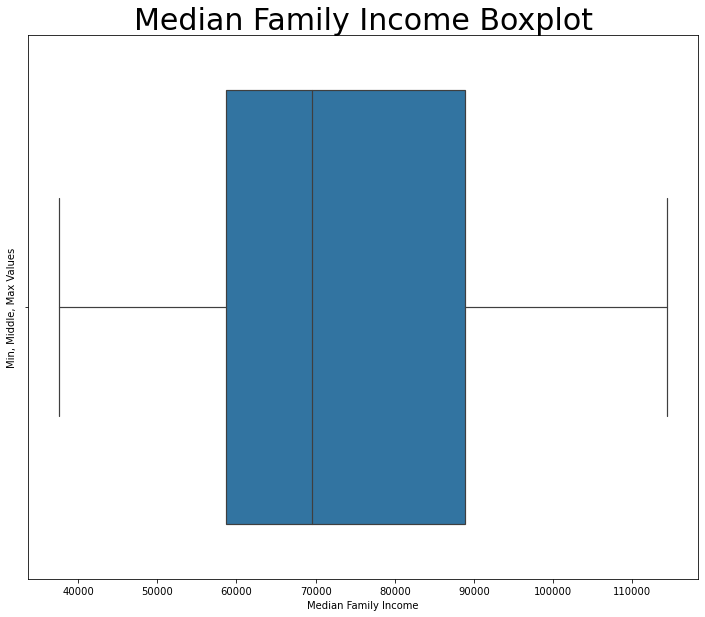

In [39]:
# Create boxplot for median family income
fig, ax = pyplot.subplots(figsize=(12,10))
plot=sns.set_style("whitegrid")
sns.set_context("paper", rc={"font.size":20, "axes.titlesize":30, "axes.labelsize":20})
#sns.set(rc={'figure.figsize':(11.7,8.27),"font.size":20,"axes.titlesize":20,"axes.labelsize":20},style="white")
ax.set_title("Median Family Income Boxplot")
ax=sns.boxplot(x=df["Median_Income"])
ax.set(xlabel="Median Family Income")
ax.set(ylabel="Min, Middle, Max Values")


[Text(0, 0.5, 'Min, Middle, Max Values')]

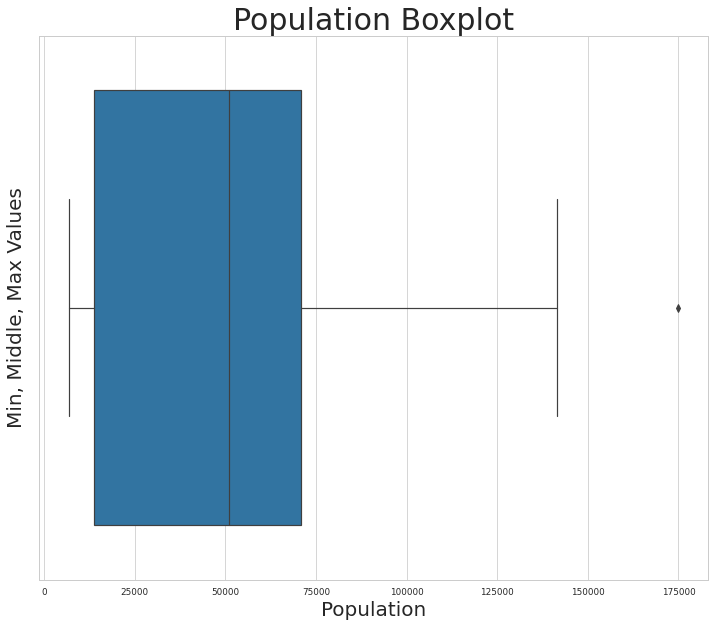

In [40]:
# Create boxplot for population
fig, ax = pyplot.subplots(figsize=(12,10))
plot=sns.set_style("whitegrid")
sns.set_context("paper", rc={"font.size":20,"axes.titlesize":30,"axes.labelsize":20})
#sns.set(rc={'figure.figsize':(11.7,8.27),"font.size":20,"axes.titlesize":20,"axes.labelsize":20},style="white")
ax.set_title("Population Boxplot")
ax=sns.boxplot(x=df["Population"])
ax.set(xlabel="Population")
ax.set(ylabel="Min, Middle, Max Values")

[Text(0, 0.5, '# of Cities')]

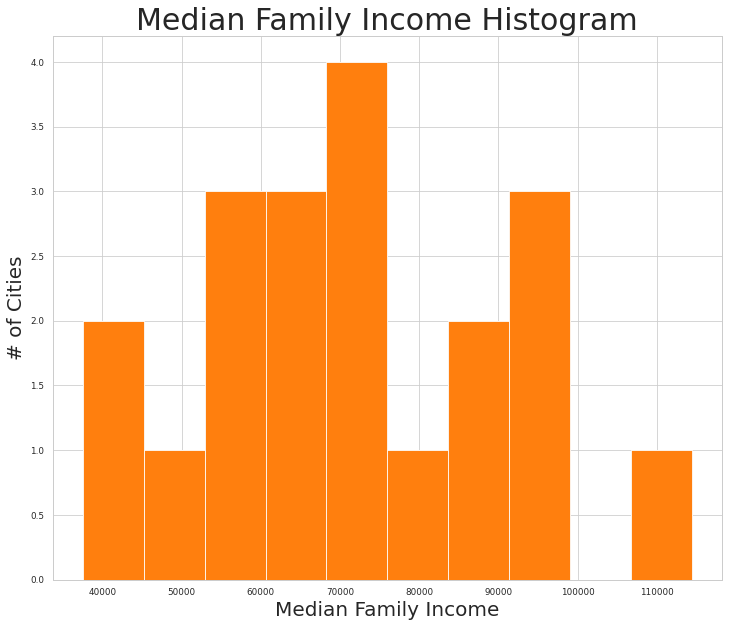

In [41]:
# Create histogram for median family income
fig, ax = pyplot.subplots(figsize=(12,10))
df['Median_Income'].plot(kind='hist')
df['Median_Income'].plot.hist()
ax.set_title("Median Family Income Histogram")
ax.set(xlabel="Median Family Income")
ax.set(ylabel="# of Cities")



[Text(0, 0.5, '# of Cities')]

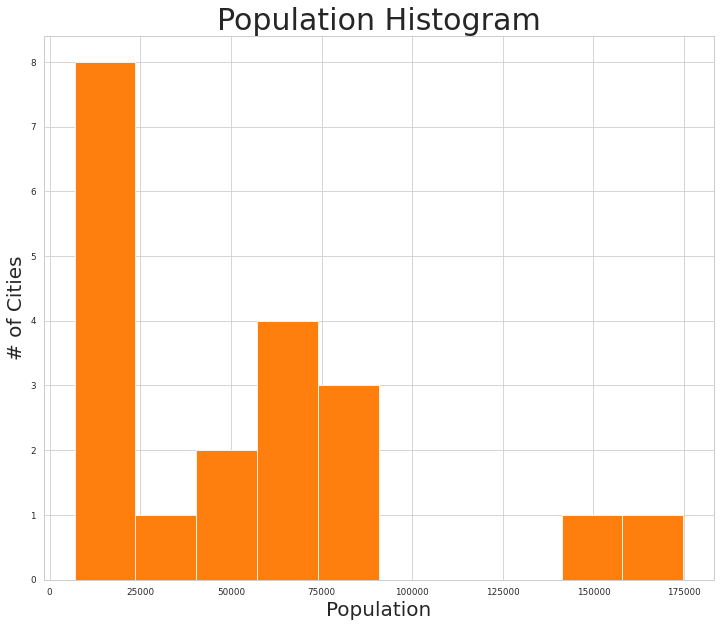

In [42]:
# Create histogram for population
fig, ax = pyplot.subplots(figsize=(12,10))
df['Population'].plot(kind='hist')
df['Population'].plot.hist()
ax.set_title("Population Histogram")
ax.set(xlabel="Population")
ax.set(ylabel="# of Cities")


[Text(0, 0.5, 'Median Family Income')]

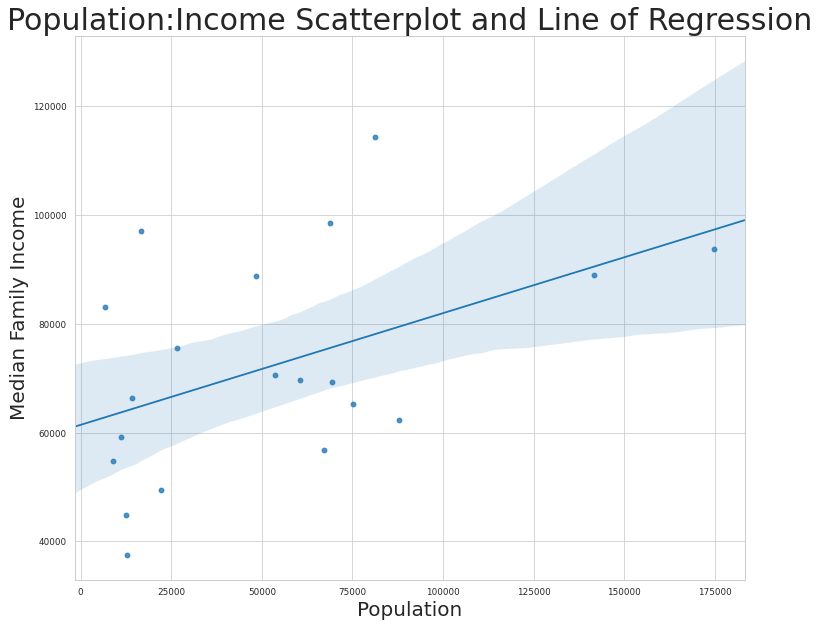

In [43]:
# Create scatterplot of median family income and population including regression line
fig, ax = pyplot.subplots(figsize=(12,10))
plot=sns.regplot(x="Population", y='Median_Income', data=df)
ax.set_title("Population:Income Scatterplot and Line of Regression")
ax.set(xlabel="Population")
ax.set(ylabel="Median Family Income")

In [44]:
# load list of cities into df2 dataframe using pandas
df2 = pd.read_csv(r"https://raw.githubusercontent.com/mkchrist/Coursera_Capstone/main/Cities.csv")

# Peek at df2 dataframe
df2.head()

,City
0,"Elk Grove, CA"
1,"Roseville, CA"
2,"Citrus Heights, CA"
3,"Davis, CA"
4,"Folsom, CA"


In [45]:
# Convert the values in df2 into a list
names = df2.values.tolist()
names

[['Elk Grove, CA'],
 ['Roseville, CA'],
 ['Citrus Heights, CA'],
 ['Davis, CA'],
 ['Folsom, CA'],
 ['Rancho Cordova, CA'],
 ['Rocklin, CA'],
 ['Woodland, CA'],
 ['Yuba City, CA'],
 ['Auburn, CA'],
 ['Galt, CA'],
 ['Grass Valley, CA'],
 ['Lincoln, CA'],
 ['Marysville, CA'],
 ['Placerville, CA'],
 ['South Lake Tahoe, CA'],
 ['Truckee, CA'],
 ['West Sacramento, CA'],
 ['Live Oak, CA'],
 ['Loomis, CA']]

In [46]:
# Use geolocator and a loop to search for, intentify longitude and latitude, then populate dataframes for latitude and longitude
Latitude2 = []
Longitude2 = []

for name in names:
    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode(name)
    latitude = location.latitude
    longitude = location.longitude
    print(f'{name}: [{latitude}, {longitude}]')
    Latitude2.append(latitude)
    Longitude2.append(longitude)        
        
print('\n')
print('DataFrames Latitude2 & Longitude2 have been updated.')

['Elk Grove, CA']: [38.4087993, -121.3716178]
['Roseville, CA']: [38.7521235, -121.2880059]
['Citrus Heights, CA']: [38.7071247, -121.2810611]
['Davis, CA']: [38.545379, -121.7445835]
['Folsom, CA']: [38.6779591, -121.1760583]
['Rancho Cordova, CA']: [38.5890723, -121.302728]
['Rocklin, CA']: [38.7907339, -121.2357828]
['Woodland, CA']: [38.6786109, -121.7733285]
['Yuba City, CA']: [39.1404477, -121.6169108]
['Auburn, CA']: [38.8945939, -121.0739897]
['Galt, CA']: [38.2546373, -121.2999485]
['Grass Valley, CA']: [39.2190799, -121.0619462]
['Lincoln, CA']: [38.859829500000004, -121.34239205792437]
['Marysville, CA']: [39.1457247, -121.5913516]
['Placerville, CA']: [38.7296252, -120.798546]
['South Lake Tahoe, CA']: [38.9332411, -119.9843482]
['Truckee, CA']: [39.327962, -120.1832533]
['West Sacramento, CA']: [38.5804609, -121.530234]
['Live Oak, CA']: [39.2757232, -121.6599701]
['Loomis, CA']: [38.8212889, -121.1930041]


DataFrames Latitude2 & Longitude2 have been updated.


In [47]:
# Create a new dataframe 'Cities' to merge City (name), Latitutde aned Longitude columns
Cities = pd.DataFrame({'City':names, 'Latitude':Latitude2, 'Longitude': Longitude2})
Cities

,City,Latitude,Longitude
0,"[Elk Grove, CA]",38.408799,-121.371618
1,"[Roseville, CA]",38.752124,-121.288006
2,"[Citrus Heights, CA]",38.707125,-121.281061
3,"[Davis, CA]",38.545379,-121.744584
4,"[Folsom, CA]",38.677959,-121.176058
5,"[Rancho Cordova, CA]",38.589072,-121.302728
6,"[Rocklin, CA]",38.790734,-121.235783
7,"[Woodland, CA]",38.678611,-121.773329
8,"[Yuba City, CA]",39.140448,-121.616911
9,"[Auburn, CA]",38.894594,-121.073990


In [48]:
# Adjust City column to remove unnecessary special characters  
Cities=Cities.replace('\[','',regex=True).astype(str)
Cities=Cities.replace('\[','',regex=True).astype(str) 
Cities=Cities.replace('\'','',regex=True).astype(str) 
Cities=Cities.replace('\]','',regex=True).astype(str) 

In [49]:
Cities

,City,Latitude,Longitude
0,"Elk Grove, CA",38.4087993,-121.3716178
1,"Roseville, CA",38.7521235,-121.2880059
2,"Citrus Heights, CA",38.7071247,-121.2810611
3,"Davis, CA",38.545379,-121.7445835
4,"Folsom, CA",38.6779591,-121.1760583
5,"Rancho Cordova, CA",38.5890723,-121.302728
6,"Rocklin, CA",38.7907339,-121.2357828
7,"Woodland, CA",38.6786109,-121.7733285
8,"Yuba City, CA",39.1404477,-121.6169108
9,"Auburn, CA",38.8945939,-121.0739897


In [50]:
# Identify the Latitude, Longitude for Sacramento, CA
address = 'Sacramento, CA'

geolocator = Nominatim(user_agent="coursera")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates for Sacramento are {}, {}.'.format(latitude, longitude))

The geograpical coordinates for Sacramento are 38.5810606, -121.4938951.


In [51]:
# Update Latitude and Longitude columns to prepare for Folium map
Cities = Cities.astype({"Latitude": float, "Longitude": float})

In [52]:
# Create a new general map of Sacramento
map2_sac = folium.Map(location=[latitude, longitude], zoom_start=9)

# Add markers to map
for lat, lng, label in zip(Cities['Latitude'], Cities['Longitude'], Cities['City']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=7,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map2_sac)  
    
map2_sac

In [53]:
# Set credentials for Foursquare search
CLIENT_ID = '************************************************' # your Foursquare ID
CLIENT_SECRET = '************************************************' # your Foursquare Secret
ACCESS_TOKEN = '************************************************' # your FourSquare Access Token
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails: <Hidden>')

Your credentails: <Hidden>


In [54]:
# Clear venues_list and create new dataframe for region_venues using 'getNearbyVenues' function and Foursquare
venues_list = []
region_venues = getNearbyVenues(names=Cities['City'], 
                                 latitudes=Cities['Latitude'], 
                                 longitudes=Cities['Longitude'], 
                                 radius=5280)

Elk Grove, CA
Roseville, CA
Citrus Heights, CA
Davis, CA
Folsom, CA
Rancho Cordova, CA
Rocklin, CA
Woodland, CA
Yuba City, CA
Auburn, CA
Galt, CA
Grass Valley, CA
Lincoln, CA
Marysville, CA
Placerville, CA
South Lake Tahoe, CA
Truckee, CA
West Sacramento, CA
Live Oak, CA
Loomis, CA


In [55]:
region_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Elk Grove, CA",38.408799,-121.371618,Dutch Bros. Coffee,38.408715,-121.384941,Coffee Shop
1,"Elk Grove, CA",38.408799,-121.371618,Brick House Restaurant & Catering,38.409295,-121.365853,American Restaurant
2,"Elk Grove, CA",38.408799,-121.371618,Palermo Ristorante Italiano,38.407947,-121.379830,Italian Restaurant
3,"Elk Grove, CA",38.408799,-121.371618,Drewski's Hot Rod Kitchen,38.408744,-121.363279,Food Truck
4,"Elk Grove, CA",38.408799,-121.371618,Thai Chili,38.408020,-121.381605,Thai Restaurant


In [56]:
# Count venues within 1 mile of all cities
region_venues.shape

(1671, 7)

In [57]:
# Count unique venue categories within 1 mile of all cities

In [58]:
# Count venues within each Neighborhood
region_venues.groupby(['Neighborhood']).count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Auburn, CA",100,100,100,100,100,100
"Citrus Heights, CA",100,100,100,100,100,100
"Davis, CA",88,88,88,88,88,88
"Elk Grove, CA",100,100,100,100,100,100
"Folsom, CA",100,100,100,100,100,100
"Galt, CA",41,41,41,41,41,41
"Grass Valley, CA",50,50,50,50,50,50
"Lincoln, CA",71,71,71,71,71,71
"Live Oak, CA",10,10,10,10,10,10


In [59]:
# Identify top 5 venue categories for each City using one hot encoding
region_onehot = pd.get_dummies(region_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
region_onehot['Neighborhood'] =region_venues['Neighborhood'] 

region_onehot.shape

(1671, 219)

In [60]:
#Find the Neighborhood column
region_onehot.columns[146]

'Neighborhood'

In [61]:
#make sure i have the same number of rows and columns (1671, 219)
region_onehot.shape

(1671, 219)

In [62]:
# move neighborhood column to the first column
fixed_columns = [region_onehot.columns[146]] + list(region_onehot.columns[0:146]) + list(region_onehot.columns[147:])
region_onehot = region_onehot[fixed_columns]

region_onehot.head()

,Neighborhood,ATM,Accessories Store,Afghan Restaurant,Airport,Airport Terminal,American Restaurant,Andhra Restaurant,Animal Shelter,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Stadium,Beach,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Shop,Bike Trail,Board Shop,Boat or Ferry,Bookstore,Bowling Alley,Boxing Gym,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Burger Joint,Burmese Restaurant,Burrito Place,Business Service,Butcher,Café,Camera Store,Campground,Candy Store,Caribbean Restaurant,Casino,Chinese Restaurant,Church,Clothing Store,Coffee Shop,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Drive-in Theater,Electronics Store,Ethiopian Restaurant,Fabric Shop,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Flower Shop,Food,Food Court,Food Stand,Food Truck,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,General Travel,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,High School,Historic Site,History Museum,Home Service,Hot Dog Joint,Hotel,Hunting Supply,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Insurance Office,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Latin American Restaurant,Lawyer,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts School,Medical Center,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Mongolian Restaurant,Motel,Movie Theater,Museum,Music Venue,Nail Salon,National Park,New American Restaurant,Nightclub,Noodle House,Organic Grocery,Other Great Outdoors,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Pool,Post Office,Print Shop,Pub,Record Shop,Rental Car Location,Resort,Restaurant,River,Rock Climbing Spot,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Shopping Plaza,Skating Rink,Ski Area,Ski Chairlift,Soccer Field,Southern / Soul Food Restaurant,Spa,Sporting Goods Shop,Sports Bar,Stadium,State / Provincial Park,Steakhouse,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Tanning Salon,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Park Ride / Attraction,Thrift / Vintage Store,Tourist Information Center,Toy / Game Store,Trail,Train Station,Tree,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Water Park,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo
0,"Elk Grove, CA",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"Elk Grove, CA",0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"Elk 

In [63]:
# Calculate mean value of each category around a City
region_grouped = region_onehot.groupby('Neighborhood').mean().reset_index()
region_grouped.head()

,Neighborhood,ATM,Accessories Store,Afghan Restaurant,Airport,Airport Terminal,American Restaurant,Andhra Restaurant,Animal Shelter,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Stadium,Beach,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Shop,Bike Trail,Board Shop,Boat or Ferry,Bookstore,Bowling Alley,Boxing Gym,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Burger Joint,Burmese Restaurant,Burrito Place,Business Service,Butcher,Café,Camera Store,Campground,Candy Store,Caribbean Restaurant,Casino,Chinese Restaurant,Church,Clothing Store,Coffee Shop,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Drive-in Theater,Electronics Store,Ethiopian Restaurant,Fabric Shop,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Flower Shop,Food,Food Court,Food Stand,Food Truck,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,General Travel,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,High School,Historic Site,History Museum,Home Service,Hot Dog Joint,Hotel,Hunting Supply,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Insurance Office,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Latin American Restaurant,Lawyer,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts School,Medical Center,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Mongolian Restaurant,Motel,Movie Theater,Museum,Music Venue,Nail Salon,National Park,New American Restaurant,Nightclub,Noodle House,Organic Grocery,Other Great Outdoors,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Pool,Post Office,Print Shop,Pub,Record Shop,Rental Car Location,Resort,Restaurant,River,Rock Climbing Spot,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Shopping Plaza,Skating Rink,Ski Area,Ski Chairlift,Soccer Field,Southern / Soul Food Restaurant,Spa,Sporting Goods Shop,Sports Bar,Stadium,State / Provincial Park,Steakhouse,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Tanning Salon,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Park Ride / Attraction,Thrift / Vintage Store,Tourist Information Center,Toy / Game Store,Trail,Train Station,Tree,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Water Park,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo
0,"Auburn, CA",0.02,0.00,0.00,0.0,0.0,0.070000,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.01,0.01,0.01,0.000000,0.010000,0.020000,0.03,0.00,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.040000,0.030000,0.0,0.000000,0.040000,0.0,0.000000,0.0,0.01,0.010000,0.00,0.0,0.0,0.01,0.00,0.02,0.0,0.00,0.060000,0.00,0.0,0.00,0.02,0.01,0.000000,0.000000,0.01,0.000000,0.00,0.00,0.01,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.01,0.010000,0.020000,0.01,0.0,0.000000,0.0,0.0,0.000000,0.00,0.010000,0.000000,0.000000,0.0,0.03,0.00,0.0,0.0,0.0,0.000000,0.0,0.000000,0.030000,0.00,0.010000,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.010000,0.0,0.000000,0.00,0.0,0.0,0.000000,0.01,0.010000,0.0,0.02,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.030000,0.000000,0.0,0.00,0.01,0.0,0.01,0.0,0.00,0.0,0.000000,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.01,0.010000,0.000000,0.00,0.00,0.010000,0.04,0.060000,0.0,0.00

In [64]:
# Review the shape of region_grouped dataframe
region_grouped.shape

(20, 219)

In [65]:
# identify the top 5 most frequent categories of venues in each Neighborhood
num_top_venues = 5

for hood in region_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = region_grouped[region_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Auburn, CA----
                 venue  freq
0  American Restaurant  0.07
1          Coffee Shop  0.06
2          Pizza Place  0.06
3       Sandwich Place  0.04
4             Pharmacy  0.04


----Citrus Heights, CA----
                venue  freq
0       Grocery Store  0.06
1         Coffee Shop  0.05
2  Chinese Restaurant  0.04
3      Ice Cream Shop  0.04
4         Pizza Place  0.04


----Davis, CA----
                venue  freq
0                Park  0.10
1         Coffee Shop  0.07
2  Mexican Restaurant  0.06
3       Grocery Store  0.06
4         Pizza Place  0.06


----Elk Grove, CA----
                  venue  freq
0           Coffee Shop  0.06
1    Mexican Restaurant  0.05
2           Pizza Place  0.04
3          Burger Joint  0.03
4  Fast Food Restaurant  0.03


----Folsom, CA----
                venue  freq
0  Mexican Restaurant  0.08
1       Grocery Store  0.06
2         Coffee Shop  0.06
3         Pizza Place  0.05
4            Pharmacy  0.04


----Galt, CA----
          

In [66]:
# Create function to return most common venues
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [67]:
# Create new dataframe neighborhoods1_venues_sorted containing Top 10 common venue categories
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns1 = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns1.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns1.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods1_venues_sorted = pd.DataFrame(columns=columns1)
neighborhoods1_venues_sorted['Neighborhood'] = region_grouped['Neighborhood']

for ind in np.arange(region_grouped.shape[0]):
    neighborhoods1_venues_sorted.iloc[ind, 1:] = return_most_common_venues(region_grouped.iloc[ind, :], num_top_venues)

neighborhoods1_venues_sorted.rename(columns={"Neighborhood":"City"}, inplace=True)
neighborhoods1_venues_sorted.head()

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Auburn, CA",American Restaurant,Pizza Place,Coffee Shop,Burger Joint,Pharmacy,Breakfast Spot,Sandwich Place,Gas Station,Mexican Restaurant,Brewery
1,"Citrus Heights, CA",Grocery Store,Coffee Shop,Pizza Place,Ice Cream Shop,Chinese Restaurant,Bar,Italian Restaurant,Park,Gym / Fitness Center,Mexican Restaurant
2,"Davis, CA",Park,Coffee Shop,Grocery Store,Mexican Restaurant,Pizza Place,Ice Cream Shop,Fast Food Restaurant,Sandwich Place,Rental Car Location,Bakery
3,"Elk Grove, CA",Coffee Shop,Mexican Restaurant,Pizza Place,Ice Cream Shop,Park,Italian Restaurant,Sushi Restaurant,Burger Joint,Pharmacy,Grocery Store
4,"Folsom, CA",Mexican Restaurant,Grocery Store,Coffee Shop,Pizza Place,Pharmacy,Sandwich Place,Café,Park,Gym / Fitness Center,Sushi Restaurant


In [68]:
# Use K-means clustering algorithm to create correlateed groups then review clusters produced
# set number of clusters
kclusters = 5

region_grouped_clustering = region_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans1 = KMeans(n_clusters=kclusters, random_state=0).fit(region_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans1.labels_[0:10]

array([1, 1, 0, 1, 1, 0, 1, 2, 3, 1], dtype=int32)

In [69]:
# add clustering labels to region_merged  
neighborhoods1_venues_sorted.insert(0, 'Cluster Labels', kmeans1.labels_)

# update region_merged dataframe to equate to Cities dataframe
region_merged = Cities

In [70]:
# Peek at region_merged dataframe
region_merged.head()

,City,Latitude,Longitude
0,"Elk Grove, CA",38.408799,-121.371618
1,"Roseville, CA",38.752124,-121.288006
2,"Citrus Heights, CA",38.707125,-121.281061
3,"Davis, CA",38.545379,-121.744584
4,"Folsom, CA",38.677959,-121.176058


In [71]:
# Peek at neighborhoods1_venues_sorted dataframe
neighborhoods1_venues_sorted.head()

,Cluster Labels,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1,"Auburn, CA",American Restaurant,Pizza Place,Coffee Shop,Burger Joint,Pharmacy,Breakfast Spot,Sandwich Place,Gas Station,Mexican Restaurant,Brewery
1,1,"Citrus Heights, CA",Grocery Store,Coffee Shop,Pizza Place,Ice Cream Shop,Chinese Restaurant,Bar,Italian Restaurant,Park,Gym / Fitness Center,Mexican Restaurant
2,0,"Davis, CA",Park,Coffee Shop,Grocery Store,Mexican Restaurant,Pizza Place,Ice Cream Shop,Fast Food Restaurant,Sandwich Place,Rental Car Location,Bakery
3,1,"Elk Grove, CA",Coffee Shop,Mexican Restaurant,Pizza Place,Ice Cream Shop,Park,Italian Restaurant,Sushi Restaurant,Burger Joint,Pharmacy,Grocery Store
4,1,"Folsom, CA",Mexican Restaurant,Grocery Store,Coffee Shop,Pizza Place,Pharmacy,Sandwich Place,Café,Park,Gym / Fitness Center,Sushi Restaurant


In [72]:
# merge region_merged with neighborhoods1_venues_sorted based on 'City' column
region_merged = region_merged.join(neighborhoods1_venues_sorted.set_index('City'), on='City')

region_merged   # check the last columns!

,City,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Elk Grove, CA",38.408799,-121.371618,1,Coffee Shop,Mexican Restaurant,Pizza Place,Ice Cream Shop,Park,Italian Restaurant,Sushi Restaurant,Burger Joint,Pharmacy,Grocery Store
1,"Roseville, CA",38.752124,-121.288006,1,Mexican Restaurant,Grocery Store,American Restaurant,Pizza Place,Coffee Shop,Fast Food Restaurant,Chinese Restaurant,Sushi Restaurant,Burger Joint,Toy / Game Store
2,"Citrus Heights, CA",38.707125,-121.281061,1,Grocery Store,Coffee Shop,Pizza Place,Ice Cream Shop,Chinese Restaurant,Bar,Italian Restaurant,Park,Gym / Fitness Center,Mexican Restaurant
3,"Davis, CA",38.545379,-121.744584,0,Park,Coffee Shop,Grocery Store,Mexican Restaurant,Pizza Place,Ice Cream Shop,Fast Food Restaurant,Sandwich Place,Rental Car Location,Bakery
4,"Folsom, CA",38.677959,-121.176058,1,Mexican Restaurant,Grocery Store,Coffee Shop,Pizza Place,Pharmacy,Sandwich Place,Café,Park,Gym / Fitness Center,Sushi Restaurant
5,"Rancho Cordova, CA",38.589072,-121.302728,0,Park,Mexican Restaurant,Coffee Shop,Pizza Place,Brewery,Grocery Store,Fast Food Restaurant,Sandwich Place,Rental Car Location,Gym
6,"Rocklin, CA",38.790734,-121.235783,1,American Restaurant,Fast Food Restaurant,Mexican Restaurant,Pizza Place,Cosmetics Shop,Coffee Shop,Sushi Restaurant,Grocery Store,Brewery,Toy / Game Store
7,"Woodland, CA",38.678611,-121.773329,0,Coffee Shop,Mexican Restaurant,Grocery Store,Park,Pizza Place,Deli / Bodega,Gym,Burger Joint,Supermarket,Stadium
8,"Yuba City, CA",39.140448,-121.616911,2,Mexican Restaurant,Sandwich Place,Coffee Shop,Fast Food Restaurant,Pharmacy,Café,Sushi Restaurant,Steakhouse,Clothing Store,Chinese Restaurant
9,"Auburn, CA",38.894594,-121.073990,1,American Restaurant,Pizza Place,Coffee Shop,Burger Joint,Pharmacy,Breakfast Spot,Sandwich Place,Gas Station,Mexican Restaurant,Brewery


In [73]:
# Update Latitude and Longitude columns to prepare for Folium map
region_merged = region_merged.astype({"Latitude": float, "Longitude": float})

In [90]:
# Create map
map1_clusters = folium.Map(location=[latitude, longitude], zoom_start=7)

# Set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# Add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(region_merged['Latitude'], region_merged['Longitude'], region_merged['City'], region_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map1_clusters)
       
map1_clusters

### Cluster 1 

In [85]:
region_merged.loc[region_merged['Cluster Labels'] == 0, region_merged.columns[[0] + list(range(4, region_merged.shape[1]))]]

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,"Davis, CA",Park,Coffee Shop,Grocery Store,Mexican Restaurant,Pizza Place,Ice Cream Shop,Fast Food Restaurant,Sandwich Place,Rental Car Location,Bakery
5,"Rancho Cordova, CA",Park,Mexican Restaurant,Coffee Shop,Pizza Place,Brewery,Grocery Store,Fast Food Restaurant,Sandwich Place,Rental Car Location,Gym
7,"Woodland, CA",Coffee Shop,Mexican Restaurant,Grocery Store,Park,Pizza Place,Deli / Bodega,Gym,Burger Joint,Supermarket,Stadium
10,"Galt, CA",Fast Food Restaurant,Pizza Place,Sandwich Place,Park,Coffee Shop,Pharmacy,Grocery Store,Hotel,Convenience Store,Cosmetics Shop


### Cluster 2 

In [86]:
region_merged.loc[region_merged['Cluster Labels'] == 1, region_merged.columns[[0] + list(range(4, region_merged.shape[1]))]]

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Elk Grove, CA",Coffee Shop,Mexican Restaurant,Pizza Place,Ice Cream Shop,Park,Italian Restaurant,Sushi Restaurant,Burger Joint,Pharmacy,Grocery Store
1,"Roseville, CA",Mexican Restaurant,Grocery Store,American Restaurant,Pizza Place,Coffee Shop,Fast Food Restaurant,Chinese Restaurant,Sushi Restaurant,Burger Joint,Toy / Game Store
2,"Citrus Heights, CA",Grocery Store,Coffee Shop,Pizza Place,Ice Cream Shop,Chinese Restaurant,Bar,Italian Restaurant,Park,Gym / Fitness Center,Mexican Restaurant
4,"Folsom, CA",Mexican Restaurant,Grocery Store,Coffee Shop,Pizza Place,Pharmacy,Sandwich Place,Café,Park,Gym / Fitness Center,Sushi Restaurant
6,"Rocklin, CA",American Restaurant,Fast Food Restaurant,Mexican Restaurant,Pizza Place,Cosmetics Shop,Coffee Shop,Sushi Restaurant,Grocery Store,Brewery,Toy / Game Store
9,"Auburn, CA",American Restaurant,Pizza Place,Coffee Shop,Burger Joint,Pharmacy,Breakfast Spot,Sandwich Place,Gas Station,Mexican Restaurant,Brewery
11,"Grass Valley, CA",Coffee Shop,Grocery Store,Pizza Place,American Restaurant,Bakery,Café,Italian Restaurant,Breakfast Spot,Discount Store,Campground
14,"Placerville, CA",Mexican Restaurant,Coffee Shop,American Restaurant,Grocery Store,Pizza Place,Sandwich Place,Brewery,Hardware Store,Bank,Fast Food Restaurant
19,"Loomis, CA",Coffee Shop,Brewery,Mexican Restaurant,Fast Food Restaurant,American Restaurant,Pet Store,Sporting Goods Shop,Bar,Rental Car Location,Garden Center


### Cluster 3 

In [87]:
region_merged.loc[region_merged['Cluster Labels'] == 2, region_merged.columns[[0] + list(range(4, region_merged.shape[1]))]]

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,"Yuba City, CA",Mexican Restaurant,Sandwich Place,Coffee Shop,Fast Food Restaurant,Pharmacy,Café,Sushi Restaurant,Steakhouse,Clothing Store,Chinese Restaurant
12,"Lincoln, CA",Pizza Place,Sandwich Place,Mexican Restaurant,Coffee Shop,Chinese Restaurant,Grocery Store,American Restaurant,Casino,Ice Cream Shop,Salon / Barbershop
13,"Marysville, CA",Mexican Restaurant,Sandwich Place,Coffee Shop,Convenience Store,Fast Food Restaurant,Pharmacy,Clothing Store,Sushi Restaurant,Café,Italian Restaurant


### Cluster 4 

In [88]:
region_merged.loc[region_merged['Cluster Labels'] == 3, region_merged.columns[[0] + list(range(4, region_merged.shape[1]))]]

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
18,"Live Oak, CA",Food,Mexican Restaurant,Sandwich Place,Market,Candy Store,Grocery Store,Convenience Store,Farmers Market,Pizza Place,Gas Station


### Cluster 5 

In [89]:
region_merged.loc[region_merged['Cluster Labels'] == 4, region_merged.columns[[0] + list(range(4, region_merged.shape[1]))]]

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
15,"South Lake Tahoe, CA",Hotel,American Restaurant,Mexican Restaurant,Coffee Shop,Brewery,Pizza Place,Burger Joint,Beach,Bar,Ski Area
16,"Truckee, CA",Golf Course,Coffee Shop,Bar,Pizza Place,Mexican Restaurant,American Restaurant,Sporting Goods Shop,Hotel,Grocery Store,Wine Bar
17,"West Sacramento, CA",New American Restaurant,American Restaurant,Brewery,Hotel,Mexican Restaurant,Movie Theater,Pizza Place,Sandwich Place,Coffee Shop,Burger Joint
